In [3]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Sentiment_Analysis_Amazon_Review/amazonreviews.tsv',sep='\t')
df

,label,review
0,pos,Stuning even for the non-gamer: This sound tra...
1,pos,The best soundtrack ever to anything.: I'm rea...
2,pos,Amazing!: This soundtrack is my favorite music...
3,pos,Excellent Soundtrack: I truly like this soundt...
4,pos,"Remember, Pull Your Jaw Off The Floor After He..."
...,...,...
9995,pos,A revelation of life in small town America in ...
9996,pos,Great biography of a very interesting journali...
9997,neg,Interesting Subject; Poor Presentation: You'd ...
9998,neg,Don't buy: The box looked used and it is obvio...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   10000 non-null  object
 1   review  10000 non-null  object
dtypes: object(2)
memory usage: 156.4+ KB


In [5]:
df.isnull().sum()

label     0
review    0
dtype: int64

In [6]:
df['label'].value_counts()

neg    5097
pos    4903
Name: label, dtype: int64

Importing all the required libraries

In [7]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import tokenize

converting the reviews into lower case

In [8]:
df.review=df.review.apply(lambda x: x.lower())
df

,label,review
0,pos,stuning even for the non-gamer: this sound tra...
1,pos,the best soundtrack ever to anything.: i'm rea...
2,pos,amazing!: this soundtrack is my favorite music...
3,pos,excellent soundtrack: i truly like this soundt...
4,pos,"remember, pull your jaw off the floor after he..."
...,...,...
9995,pos,a revelation of life in small town america in ...
9996,pos,great biography of a very interesting journali...
9997,neg,interesting subject; poor presentation: you'd ...
9998,neg,don't buy: the box looked used and it is obvio...


In [9]:
!pip install contractions

     |████████████████████████████████| 287 kB 32.2 MB/s 
     |████████████████████████████████| 106 kB 75.2 MB/s 


In [10]:
import contractions
# Expanding contractions
def con(text):
  expand=contractions.fix(text)
  return expand

df.review=df.review.apply(con)
df['review'][0]

'stuning even for the non-gamer: this sound track was beautiful! it paints the senery in your mind so well i would recomend it even to people who hate vid. game music! i have played the game chrono cross but out of all of the games i have ever played it has the best music! it backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. it would impress anyone who cares to listen! ^_^'

In [11]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [12]:
import re
def remove_sp(text):
  pattern=r'[^A-Za-z0-9\s]'
  text=re.sub(pattern,'',text)
  return text
df.review=df.review.apply(remove_sp)
df

,label,review
0,pos,stuning even for the nongamer this sound track...
1,pos,the best soundtrack ever to anything i am read...
2,pos,amazing this soundtrack is my favorite music o...
3,pos,excellent soundtrack i truly like this soundtr...
4,pos,remember pull your jaw off the floor after hea...
...,...,...
9995,pos,a revelation of life in small town america in ...
9996,pos,great biography of a very interesting journali...
9997,neg,interesting subject poor presentation you woul...
9998,neg,do not buy the box looked used and it is obvio...


In [13]:
import string
punctuations=list(string.punctuation)

In [14]:
df.review=df.review.apply(lambda x : " ".join(x for x in x.split() if x not in punctuations))
df.head()

,label,review
0,pos,stuning even for the nongamer this sound track...
1,pos,the best soundtrack ever to anything i am read...
2,pos,amazing this soundtrack is my favorite music o...
3,pos,excellent soundtrack i truly like this soundtr...
4,pos,remember pull your jaw off the floor after hea...


In [15]:
# Removing stopwords
nltk.download('stopwords')
stopword_list=stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
stopword_list.remove('no')
stopword_list.remove('not')

In [17]:
df.review=df.review.apply(lambda x : " ".join(x for x in x.split() if x not in stopword_list))
df['review'][1]

'best soundtrack ever anything reading lot reviews saying best game soundtrack figured would write review disagree bit opinino yasunori mitsudas ultimate masterpiece music timeless listening years beauty simply refuses fadethe price tag pretty staggering must say going buy cd much money one feel would worth every penny'

In [18]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [19]:
df['review']=df.review.apply(word_tokenize)
df['review'][1]

['best',
 'soundtrack',
 'ever',
 'anything',
 'reading',
 'lot',
 'reviews',
 'saying',
 'best',
 'game',
 'soundtrack',
 'figured',
 'would',
 'write',
 'review',
 'disagree',
 'bit',
 'opinino',
 'yasunori',
 'mitsudas',
 'ultimate',
 'masterpiece',
 'music',
 'timeless',
 'listening',
 'years',
 'beauty',
 'simply',
 'refuses',
 'fadethe',
 'price',
 'tag',
 'pretty',
 'staggering',
 'must',
 'say',
 'going',
 'buy',
 'cd',
 'much',
 'money',
 'one',
 'feel',
 'would',
 'worth',
 'every',
 'penny']

In [20]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [21]:
lemmatizer=WordNetLemmatizer()

In [22]:
df['review']=df.review.apply(lambda x:[lemmatizer.lemmatize(word) for word in x])

In [23]:
df.head()

,label,review
0,pos,"[stuning, even, nongamer, sound, track, beauti..."
1,pos,"[best, soundtrack, ever, anything, reading, lo..."
2,pos,"[amazing, soundtrack, favorite, music, time, h..."
3,pos,"[excellent, soundtrack, truly, like, soundtrac..."
4,pos,"[remember, pull, jaw, floor, hearing, played, ..."


In [24]:
df.review= df.review.astype(str)

In [25]:
import numpy as np
review_list=df['review'].array
review_list.shape

(10000,)

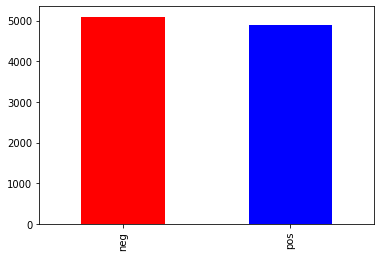

In [26]:
import matplotlib.pyplot as plt
df['label'].value_counts().sort_index().plot.bar(color=['red', 'blue'])

Splitting the Dataset

In [27]:
x = df.iloc[:,1].values
y = df.iloc[:,0].values

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state =0,stratify = y)


In [29]:
np.unique(y_train,return_counts=True)

(array(['neg', 'pos'], dtype=object), array([4078, 3922]))

In [30]:
np.unique(y_test,return_counts=True)

(array(['neg', 'pos'], dtype=object), array([1019,  981]))

In [31]:
x_train.shape

(8000,)

In [32]:
y_train.shape

(8000,)

In [33]:
#Vectorization using TFIDF Vectorizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
svc_model = Pipeline([('tfidf',TfidfVectorizer()),('model',SVC())])


In [34]:
svc_model.fit(x_train,y_train)
y_pred = svc_model.predict(x_test)
np.unique(y_pred,return_counts=True)

(array(['neg', 'pos'], dtype=object), array([ 987, 1013]))

In [35]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_pred,y_test)*100

87.8

In [36]:
confusion_matrix(y_pred,y_test)

array([[881, 106],
       [138, 875]])

In [37]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         neg       0.86      0.89      0.88       987
         pos       0.89      0.86      0.88      1013

    accuracy                           0.88      2000
   macro avg       0.88      0.88      0.88      2000
weighted avg       0.88      0.88      0.88      2000



In [38]:
svc_model.predict(['This product is amazing!'])

array(['pos'], dtype=object)

In [39]:
from sklearn.naive_bayes import MultinomialNB
nb_model = Pipeline([('tfidf',TfidfVectorizer()),('model1',MultinomialNB())])


In [40]:
nb_model.fit(x_train,y_train)
y_pred1 = nb_model.predict(x_test)
np.unique(y_pred1,return_counts=True)

(array(['neg', 'pos'], dtype='<U3'), array([1116,  884]))

In [41]:
accuracy_score(y_pred1,y_test)*100

84.65

In [42]:
confusion_matrix(y_pred1,y_test)

array([[914, 202],
       [105, 779]])

In [43]:
print(classification_report(y_pred1,y_test))

              precision    recall  f1-score   support

         neg       0.90      0.82      0.86      1116
         pos       0.79      0.88      0.84       884

    accuracy                           0.85      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.85      0.85      0.85      2000



In [44]:
nb_model.predict(['This product is amazing!'])

array(['pos'], dtype='<U3')

In [45]:
nb_model.predict(['this product quality is not good'])

array(['neg'], dtype='<U3')

In [46]:
from sklearn.linear_model import LogisticRegression
log_model = Pipeline([('tfidf',TfidfVectorizer()),('model2',LogisticRegression())])

In [47]:
log_model.fit(x_train,y_train)
y_pred2 = log_model.predict(x_test)
np.unique(y_pred2,return_counts=True)

(array(['neg', 'pos'], dtype=object), array([ 991, 1009]))

In [48]:
accuracy_score(y_pred2,y_test)*100

87.2

In [49]:
confusion_matrix(y_pred2,y_test)

array([[877, 114],
       [142, 867]])

In [50]:
print(classification_report(y_pred2,y_test))

              precision    recall  f1-score   support

         neg       0.86      0.88      0.87       991
         pos       0.88      0.86      0.87      1009

    accuracy                           0.87      2000
   macro avg       0.87      0.87      0.87      2000
weighted avg       0.87      0.87      0.87      2000



In [51]:
log_model.predict(['This product is amazing!'])

array(['pos'], dtype=object)

In [54]:
import pickle
pickle.dump(svc_model,open('/content/drive/MyDrive/Colab Notebooks/Sentiment_Analysis_Amazon_Review/sentiment_analysis_model.pkl','wb'))